In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("Housing.csv")
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
y_n={
   "yes":1,
    "no":0
}

f_s={
    "furnished":1,
    "semi-furnished":0,
    "unfurnished":-1
}

col=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]

for x in col:
    data[x]=data[x].apply(lambda x:y_n[x])   

data["furnishingstatus"]=data["furnishingstatus"].apply(lambda x:f_s[x])


In [4]:
data.shape

(545, 13)

In [5]:
data=data.dropna()
data.shape

(545, 13)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(data.drop("price",axis=1),data["price"],test_size=0.2,random_state=42)

In [8]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

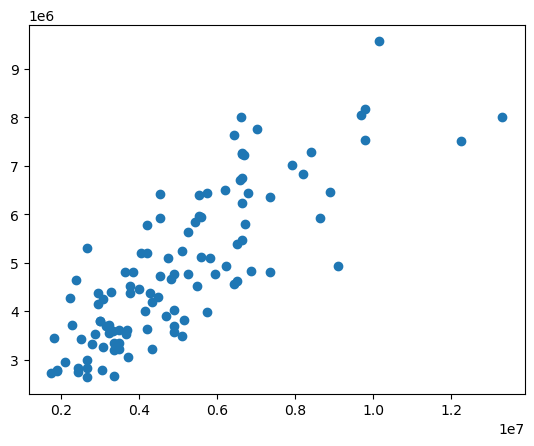

In [15]:

predict=lm.predict(X_test)
plt.scatter(Y_test,predict)
plt.show()


,y1,Y2
316,4060000,5.203692e+06
77,6650000,7.257004e+06
360,3710000,3.062829e+06
90,6440000,4.559592e+06
493,2800000,3.332932e+06


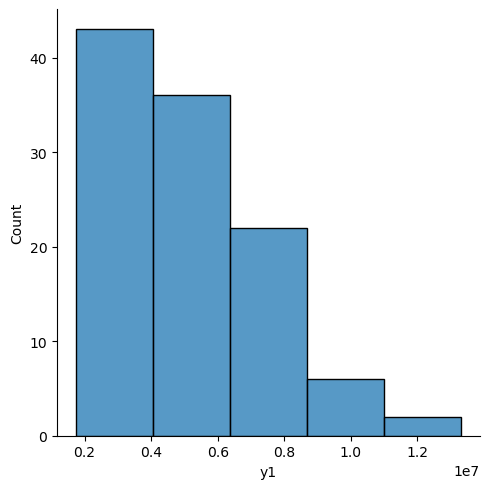

In [10]:

import seaborn as sns
df=pd.DataFrame({'y1':Y_test,'Y2':predict})
sns.displot(df,x='y1',bins=5)

df.head()

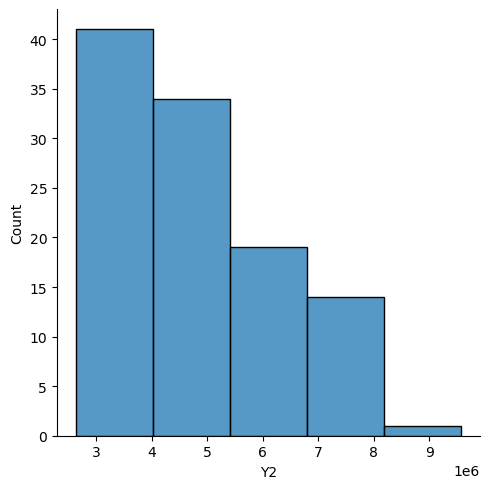

In [11]:
sns.displot(df,x='Y2',bins=5)

In [12]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(Y_test,predict.reshape(1,109)))

In [13]:
df=pd.DataFrame({'x1':[2,3,4],'x2':[5,6,7]})
df.head()

,x1,x2
0,2,5
1,3,6
2,4,7


In [14]:

def aas(x):
    print(x)
    return x**2
    

a=df.apply(aas,axis=1)
a.head()

x1    2
x2    5
Name: 0, dtype: int64
x1    3
x2    6
Name: 1, dtype: int64
x1    4
x2    7
Name: 2, dtype: int64


,x1,x2
0,4,25
1,9,36
2,16,49
